In [1]:
!pip install econml                  # DoubleML is part of EconML
!pip install sklearn                 # For ML models
!pip install pandas numpy matplotlib # Data handling and plotting

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 1.4 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 35.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 37.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 36.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 25.8 MB/s eta 0:00:0000:0100:01
  Created wheel for shap: filename=shap-0.43.0-cp312-cp312-linux_x86_64.whl size=580097 sha256=9c2a6fe617c6c204f4c5055f79e4211085cea196fdd212e13e10b6bdd12c3298
  Stored in directory: /home/codespace/.cache/pip/wheels/e0/cb/3e/46cb0f77e2e4f5aa9fd5d399dedb3ba84f91f0c49e3db7d0e1
Su

In [2]:
import numpy as np
import pandas as pd

# Create synthetic tax policy data
np.random.seed(42)
n_samples = 1000

tax_rate = np.random.uniform(5, 30, n_samples)  # Continuous treatment (5%-30% tax)
subsidy = np.random.binomial(1, 0.3, n_samples) # Binary treatment (30% get subsidy)

df = pd.DataFrame({
    'tax_rate': tax_rate,
    'subsidy': subsidy,
    'gdp_growth': 2 + 0.5*np.log(tax_rate) + 0.7*subsidy + np.random.normal(0, 1, n_samples),
    'inflation': np.random.normal(2, 0.5, n_samples),
    'population': np.random.randint(1e6, 1e7, n_samples)
})

In [4]:
import numpy as np
import pandas as pd

# Create synthetic tax policy data
np.random.seed(42)
n_samples = 1000

tax_rate = np.random.uniform(5, 30, n_samples)  # Continuous treatment (5%-30% tax)
subsidy = np.random.binomial(1, 0.3, n_samples) # Binary treatment (30% get subsidy)

df = pd.DataFrame({
    'tax_rate': tax_rate,
    'subsidy': subsidy,
    'gdp_growth': 2 + 0.5*np.log(tax_rate) + 0.7*subsidy + np.random.normal(0, 1, n_samples),
    'inflation': np.random.normal(2, 0.5, n_samples),
    'population': np.random.randint(1e6, 1e7, n_samples)
})
df.head()

,tax_rate,subsidy,gdp_growth,inflation,population
0,14.363503,0,2.454363,2.935483,8056784
1,28.767858,0,2.852749,2.194807,9543144
2,23.299849,1,4.047745,1.565854,7234408
3,19.966462,1,4.564392,2.267315,1624773
4,8.900466,1,4.706636,0.682126,8581002


In [6]:
from econml.dml import LinearDML
from sklearn.ensemble import GradientBoostingRegressor

# Initialize model
model = LinearDML(
    model_y=GradientBoostingRegressor(),  # Predict outcome (GDP)
    model_t=GradientBoostingRegressor(),  # Predict treatment (tax rate)
    discrete_treatment=False
)
# Fit model
model.fit(
    Y=df['gdp_growth'],  # Outcome
    T=df['tax_rate'],    # Treatment
    X=df[['inflation', 'population']]  # Confounders
)
# Results
# Results
print("ATE:", model.ate(X=df[['inflation', 'population']]))

ATE: 0.039381495412971076


In [11]:
from sklearn.ensemble import GradientBoostingRegressor

model = LinearDML(
    model_y=GradientBoostingRegressor(),
    model_t=GradientBoostingRegressor(),
    discrete_treatment=True
)
model.fit(
    Y=df['high_growth'],
    T=df['subsidy'],
    X=df[['tax_rate', 'inflation', 'population']]
)
print("Subsidy ATE:", model.ate(X=df[['tax_rate', 'inflation', 'population']]))

Subsidy ATE: 0.34854135633664657


First stage model has discrete target but model is not a classifier!
First stage model has discrete target but model is not a classifier!


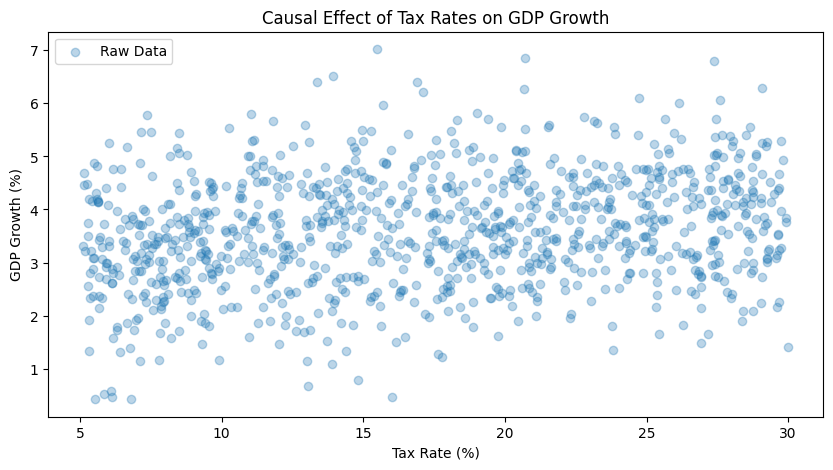

In [12]:
import matplotlib.pyplot as plt

# Plot treatment effects
plt.figure(figsize=(10, 5))
plt.scatter(df['tax_rate'], df['gdp_growth'], alpha=0.3, label='Raw Data')
plt.xlabel('Tax Rate (%)')
plt.ylabel('GDP Growth (%)')
plt.title('Causal Effect of Tax Rates on GDP Growth')
plt.legend()
plt.show()